# Final Project CSCI 636: Predicting the Presence of Scholarly Articles in Twitter 
**_Team Members:_** 
1. Miftahul Jannat Mokarrama, Z1936043
2. Bhavana Ramineni, Z1904418

**Data source:** Altmetric.com <br>
**Data size:** 13.5 GB

In [1]:
#pip install langdetect

In [2]:
from langdetect import detect
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast
import csv

In [3]:
data=pd.read_csv('articleswithscore.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10120162 entries, 0 to 10120161
Data columns (total 26 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Altmetric_ID                int64  
 1   Scopus                      object 
 2   twitter_poster_types        object 
 3   paper_pubdate               object 
 4   first_seen_on               object 
 5   last_mentioned_on           float64
 6   subjects                    object 
 7   selected_quotes             object 
 8   funders                     object 
 9   twitter_unique_users_count  float64
 10  twitter_posts_count         float64
 11  journal                     object 
 12  research_type               object 
 13  publisher                   object 
 14  Altmetric_score             float64
 15  Authors                     object 
 16  tweet_id                    float64
 17  tweeter_desc                object 
 18  tweeter_id                  float64
 19  twitter_author_foll

In [5]:
data.describe()

,Altmetric_ID,last_mentioned_on,twitter_unique_users_count,twitter_posts_count,Altmetric_score,tweet_id,tweeter_id,twitter_author_followers,overall_score
count,1.012016e+07,1.012016e+07,1.012016e+07,1.012016e+07,1.012016e+07,1.012016e+07,1.011979e+07,1.010134e+07,6.651426e+06
mean,1.392374e+07,1.507805e+09,4.124679e+02,4.869255e+02,3.773985e+02,7.871003e+17,8.199360e+16,5.422419e+03,1.095924e+01
std,9.147542e+06,2.698858e+07,1.188762e+03,1.387318e+03,8.226972e+02,1.556293e+17,2.440206e+17,6.228664e+04,8.201798e+00
min,1.711770e+05,1.310468e+09,1.000000e+00,1.000000e+00,2.500000e-01,8.445579e+16,1.600000e+01,-1.000000e+00,0.000000e+00
25%,4.781198e+06,1.499460e+09,2.300000e+01,2.700000e+01,2.095000e+01,7.046832e+17,1.747009e+08,2.220000e+02,5.400000e+00
50%,1.350014e+07,1.517754e+09,7.800000e+01,9.200000e+01,8.640000e+01,8.303913e+17,6.169656e+08,6.830000e+02,8.500000e+00
75%,2.131171e+07,1.526462e+09,2.720000e+02,3.250000e+02,3.383500e+02,9.023060e+17,2.775676e+09,2.085000e+03,1.470000e+01
max,3.154954e+07,1.567984e+09,1.223700e+04,1.474600e+04,8.268560e+03,1.008651e+18,1.008626e+18,4.573487e+07,3.850000e+01


## Data Preprocessing 

In [6]:
#remove duplicates
data.drop_duplicates(subset='Altmetric_ID', inplace=True)


In [7]:
# tweet_data.head()

In [8]:
np.random.seed(0)
tweet_data=data.copy(deep=False)

In [9]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435843 entries, 0 to 10120157
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Altmetric_ID                435843 non-null  int64  
 1   Scopus                      435843 non-null  object 
 2   twitter_poster_types        435843 non-null  object 
 3   paper_pubdate               435843 non-null  object 
 4   first_seen_on               435843 non-null  object 
 5   last_mentioned_on           435843 non-null  float64
 6   subjects                    435843 non-null  object 
 7   selected_quotes             435843 non-null  object 
 8   funders                     435843 non-null  object 
 9   twitter_unique_users_count  435843 non-null  float64
 10  twitter_posts_count         435843 non-null  float64
 11  journal                     435843 non-null  object 
 12  research_type               435843 non-null  object 
 13  publisher   

In [10]:
#remove null entries
tweet_data.dropna(inplace=True)

In [11]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25712 entries, 0 to 10120046
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Altmetric_ID                25712 non-null  int64  
 1   Scopus                      25712 non-null  object 
 2   twitter_poster_types        25712 non-null  object 
 3   paper_pubdate               25712 non-null  object 
 4   first_seen_on               25712 non-null  object 
 5   last_mentioned_on           25712 non-null  float64
 6   subjects                    25712 non-null  object 
 7   selected_quotes             25712 non-null  object 
 8   funders                     25712 non-null  object 
 9   twitter_unique_users_count  25712 non-null  float64
 10  twitter_posts_count         25712 non-null  float64
 11  journal                     25712 non-null  object 
 12  research_type               25712 non-null  object 
 13  publisher                   

In [12]:
tweet_data1=tweet_data.copy(deep=False)

In [13]:
#convert to original format from string type
tweet_data1['author_loc'] = tweet_data1['author_loc'].apply(ast.literal_eval)
tweet_data1['Scopus'] = tweet_data1['Scopus'].apply(ast.literal_eval)
tweet_data1['twitter_poster_types'] = tweet_data1['twitter_poster_types'].apply(ast.literal_eval)
tweet_data1['subjects'] = tweet_data1['subjects'].apply(ast.literal_eval)
tweet_data1['funders'] = tweet_data1['funders'].apply(ast.literal_eval)

In [14]:
#convert to DateTime type
tweet_data1.paper_pubdate=pd.to_datetime(tweet_data1.paper_pubdate)
tweet_data1.tweet_posted_on=pd.to_datetime(tweet_data1.tweet_posted_on)
tweet_data1.first_seen_on=pd.to_datetime(tweet_data1.first_seen_on)

In [15]:
#function for detecting english texts only
def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [16]:
tweet_data1 = tweet_data1[tweet_data1['tweeter_desc'].apply(detect_en)]
tweet_data1 = tweet_data1[tweet_data1['publisher'].apply(detect_en)]

In [17]:
#Extract year and make new columns
tweet_data1['tweeter_posting_year'] = pd.DatetimeIndex(tweet_data1['tweet_posted_on']).year
#t1['tweeter_posting_year'].value_counts()
tweet_data1['first_seen_on_year'] = pd.DatetimeIndex(tweet_data1['first_seen_on']).year
#t1['first_seen_on_year'].value_counts()
tweet_data1['paper_pub_year']= pd.DatetimeIndex(tweet_data1['paper_pubdate']).year 
#t1['paper_pub_year'].value_counts()

In [18]:
tweet_data1=tweet_data1[tweet_data1['tweeter_posting_year']==tweet_data1['first_seen_on_year']]

In [19]:
tweet_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13749 entries, 0 to 10120016
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Altmetric_ID                13749 non-null  int64              
 1   Scopus                      13749 non-null  object             
 2   twitter_poster_types        13749 non-null  object             
 3   paper_pubdate               13749 non-null  datetime64[ns, UTC]
 4   first_seen_on               13749 non-null  datetime64[ns, UTC]
 5   last_mentioned_on           13749 non-null  float64            
 6   subjects                    13749 non-null  object             
 7   selected_quotes             13749 non-null  object             
 8   funders                     13749 non-null  object             
 9   twitter_unique_users_count  13749 non-null  float64            
 10  twitter_posts_count         13749 non-null  float64    

In [20]:
tweet_data2=tweet_data1.copy(deep=False)

In [21]:
tweet_data2['author_loc'].describe()

count                        13749
unique                        1519
top       {'ln': None, 'lt': None}
freq                          3818
Name: author_loc, dtype: object

In [22]:
#Extract country code and create new column 
tweet_data2['country'] = tweet_data2['author_loc'].apply(lambda x: x.get('country'))

In [23]:
tweet_data2['country'].describe()

count     9897
unique     128
top         US
freq      3951
Name: country, dtype: object

In [24]:
tweet_data2['country'].value_counts()

US    3951
GB    2494
CA     558
AU     515
FR     243
      ... 
DZ       1
MN       1
ZM       1
GW       1
         1
Name: country, Length: 128, dtype: int64

In [25]:
tweet_data2.dropna(inplace=True)

In [26]:
tweet_data2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9897 entries, 0 to 10120016
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Altmetric_ID                9897 non-null   int64              
 1   Scopus                      9897 non-null   object             
 2   twitter_poster_types        9897 non-null   object             
 3   paper_pubdate               9897 non-null   datetime64[ns, UTC]
 4   first_seen_on               9897 non-null   datetime64[ns, UTC]
 5   last_mentioned_on           9897 non-null   float64            
 6   subjects                    9897 non-null   object             
 7   selected_quotes             9897 non-null   object             
 8   funders                     9897 non-null   object             
 9   twitter_unique_users_count  9897 non-null   float64            
 10  twitter_posts_count         9897 non-null   float64     

In [27]:
tweet_data2['twitter_posts_count'].describe()

count    9897.000000
mean       47.242397
std       133.379205
min         1.000000
25%         6.000000
50%        15.000000
75%        42.000000
max      7044.000000
Name: twitter_posts_count, dtype: float64

In [28]:
#twitter post with 1 count have no share, so remove those entries
tweet_data2=tweet_data2[tweet_data2['twitter_posts_count']!=1.0]
tweet_data2['twitter_posts_count'].describe()

count    9775.000000
mean       47.819540
std       134.108331
min         2.000000
25%         6.000000
50%        15.000000
75%        43.000000
max      7044.000000
Name: twitter_posts_count, dtype: float64

In [29]:
#Filtered dataframe with our target attributes for the task
twitter=tweet_data2[['Scopus','twitter_poster_types','subjects','funders','publisher','journal','research_type','country','twitter_author_followers','tweeter_posting_year','twitter_posts_count']]

In [30]:
twitter1=twitter.copy(deep=False)

In [31]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9775 entries, 0 to 10120016
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Scopus                    9775 non-null   object 
 1   twitter_poster_types      9775 non-null   object 
 2   subjects                  9775 non-null   object 
 3   funders                   9775 non-null   object 
 4   publisher                 9775 non-null   object 
 5   journal                   9775 non-null   object 
 6   research_type             9775 non-null   object 
 7   country                   9775 non-null   object 
 8   twitter_author_followers  9775 non-null   float64
 9   tweeter_posting_year      9775 non-null   int64  
 10  twitter_posts_count       9775 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 916.4+ KB


In [32]:
twitter1.head()

,Scopus,twitter_poster_types,subjects,funders,publisher,journal,research_type,country,twitter_author_followers,tweeter_posting_year,twitter_posts_count
0,"[Biochemistry, Genetics and Molecular Biology,...","{'researcher': 1, 'member_of_the_public': 1}",[molecularbiology],[nigms],Oxford University Press,Molecular Biology and Evolution,article,ES,2297.0,2014,2.0
431,"[Physical Sciences, Life Sciences, Agricultura...","{'researcher': 10, 'member_of_the_public': 13,...",[environmentalhealth],[niehs],Wiley/Blackwell (10.1111),Conservation Biology,article,US,372.0,2015,31.0
1407,"[Medicine, Health Sciences]","{'researcher': 7, 'science_communicator': 1, '...",[cardiology],"[niehs, nhlbi]",Journal of the American College of Cardiology,Journal of the American College of Cardiology ...,article,AU,1153.0,2017,62.0
1611,"[Medicine, Social Sciences, Health Sciences]","{'researcher': 1, 'member_of_the_public': 3}",[ethics],[niehs],Wiley-Blackwell,Bioethics,article,GB,1579.0,2017,4.0
1990,[Social Sciences],"{'researcher': 4, 'member_of_the_public': 3, '...","[biology, embryology]",[niehs],Oxford University Press for The Company of Bio...,Development (09501991),article,US,229.0,2017,9.0


In [33]:
twitter1.describe()

,twitter_author_followers,tweeter_posting_year,twitter_posts_count
count,9775.000000,9775.000000,9775.000000
mean,4720.131355,2015.159591,47.819540
std,20232.236254,1.617603,134.108331
min,0.000000,2011.000000,2.000000
25%,415.000000,2014.000000,6.000000
50%,1077.000000,2015.000000,15.000000
75%,2841.500000,2017.000000,43.000000
max,954337.000000,2018.000000,7044.000000


In [34]:
# Binary encoding of column 'Scopus', 'subjects', 'funders', and 'twitter_poster_types'

In [35]:
for row,value in twitter1.Scopus.iteritems():
    #print(k,v)
        for item in value:
            #print(i)
            if item not in twitter1:
                twitter1[item]=0
            twitter1.at[row,item]=1

In [36]:
for row,value in twitter1.subjects.iteritems():
    #print(k,v)
        for item in value:
            #print(i)
            if item not in twitter1:
                twitter1[item]=0
            twitter1.at[row,item]=1

In [37]:
for row,value in twitter1.funders.iteritems():
    #print(k,v)
        for item in value:
            #print(i)
            if item not in twitter1:
                twitter1[item]=0
            twitter1.at[row,item]=1

In [38]:
for row,value in twitter1.twitter_poster_types.iteritems():
        for item in value.keys():
            if item not in twitter1:
                twitter1[item]=0
            twitter1.at[row,item]= value[item]

In [39]:
# remove old columns 'Scopus', 'subjects', 'funders', and 'twitter_poster_types' after binary encoding
twitter1.drop(columns=['Scopus','twitter_poster_types','subjects','funders'], inplace=True)
twitter1.head()

,publisher,journal,research_type,country,twitter_author_followers,tweeter_posting_year,twitter_posts_count,"Biochemistry, Genetics and Molecular Biology",Agricultural and Biological Sciences,Life Sciences,...,aruk,bhf,cruk,niams,csouk,fwf,researcher,member_of_the_public,science_communicator,practitioner
0,Oxford University Press,Molecular Biology and Evolution,article,ES,2297.0,2014,2.0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
431,Wiley/Blackwell (10.1111),Conservation Biology,article,US,372.0,2015,31.0,0,1,1,...,0,0,0,0,0,0,10,13,3,0
1407,Journal of the American College of Cardiology,Journal of the American College of Cardiology ...,article,AU,1153.0,2017,62.0,0,0,0,...,0,0,0,0,0,0,7,45,1,5
1611,Wiley-Blackwell,Bioethics,article,GB,1579.0,2017,4.0,0,0,0,...,0,0,0,0,0,0,1,3,0,0
1990,Oxford University Press for The Company of Bio...,Development (09501991),article,US,229.0,2017,9.0,0,0,0,...,0,0,0,0,0,0,4,3,2,0


In [40]:
twitter1.describe()

,twitter_author_followers,tweeter_posting_year,twitter_posts_count,"Biochemistry, Genetics and Molecular Biology",Agricultural and Biological Sciences,Life Sciences,Physical Sciences,Environmental Science,Medicine,Health Sciences,...,aruk,bhf,cruk,niams,csouk,fwf,researcher,member_of_the_public,science_communicator,practitioner
count,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,...,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000,9775.000000
mean,4720.131355,2015.159591,47.819540,0.354066,0.156624,0.429156,0.083171,0.024757,0.630997,0.649514,...,0.002558,0.011662,0.015550,0.013402,0.006445,0.001432,9.773197,25.303632,1.440716,4.418005
std,20232.236254,1.617603,134.108331,0.478254,0.363465,0.494981,0.276155,0.155392,0.482559,0.477147,...,0.050510,0.107367,0.123732,0.114993,0.080026,0.037820,25.078588,79.083283,3.375719,14.179677
min,0.000000,2011.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.000000,2014.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,1077.000000,2015.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,1.000000,1.000000
75%,2841.500000,2017.000000,43.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,21.000000,2.000000,3.000000
max,954337.000000,2018.000000,7044.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,614.000000,4689.000000,109.000000,630.000000


In [41]:
twitter1.research_type.value_counts()

article    9719
chapter      31
news         25
Name: research_type, dtype: int64

In [42]:
twitter1 = twitter1.replace({'publisher':{'Wiley/Blackwell (10.1111)':'Wiley-Blackwell Publishing Ltd','Wiley Subscription Services, Inc., A Wiley Company':'Wiley-Blackwell Publishing Ltd','Blackwell Publishing Ltd':'Wiley-Blackwell Publishing Ltd'}})
counts=twitter1.publisher.value_counts()
twitter1 = twitter1[~twitter1['publisher'].isin(counts[(counts>=1000) | (counts<10)].index)]

#counts[(counts>=10) & (counts<20) ]


In [43]:
twitter1.publisher.value_counts()

Wiley-Blackwell                           561
BioMed Central Ltd                        521
Oxford University Press                   404
Nature Research                           332
National Academy of Sciences              329
                                         ... 
 Annual Reviews                            11
Informa Healthcare                         10
Thieme Medical Publishers                  10
American Physical Society                  10
 American Society of Clinical Oncology     10
Name: publisher, Length: 93, dtype: int64

In [44]:
#twitter1.loc[(twitter1.publisher == 'Wiley/Blackwell (10.1111)'),'publisher']='Wiley-Blackwell Publishing Ltd'
#twitter2 = twitter1.replace({'publisher':{'Wiley/Blackwell (10.1111)':'Wiley-Blackwell Publishing Ltd', 'Wiley-Liss Inc.':'Wiley-Blackwell Publishing Ltd','Wiley-Blackwell Publishing, Inc.':'Wiley-Blackwell Publishing Ltd','Wiley-Blackwell':'Wiley-Blackwell Publishing Ltd','Wiley Subscription Services, Inc., A Wiley Company':'Wiley-Blackwell Publishing Ltd','Wiley Subscription Services, Inc.':'Wiley-Blackwell Publishing Ltd'}})
#twitter2 = twitter1.replace({'mpublisher':{['Wiley/Blackwell (10.1111','Wiley-Liss Inc.','Wiley-Blackwell Publishing, Inc.']:'Wiley-Blackwell Publishing Ltd'}})

In [45]:
counts=twitter1.journal.value_counts()
twitter1 = twitter1[~twitter1['journal'].isin(counts[(counts>=1000) | (counts<10)].index)] # twitter posts count between (2 to 36)
#counts[(counts>=10) & (counts<1000)]

In [46]:
twitter1['journal'].value_counts()

Proceedings of the National Academy of Sciences of the United States of America    383
Science                                                                            246
British Medical Journal                                                            214
JAMA: Journal of the American Medical Association                                  175
Nature                                                                             112
                                                                                  ... 
Journal of the Royal Society of Medicine                                            10
American Journal of Epidemiology                                                    10
Human Brain Mapping                                                                 10
Global Change Biology                                                               10
Circulation: Cardiovascular Quality & Outcomes                                      10
Name: journal, Length: 168, dtype: int64

In [47]:
#target values processing starts here
twitter1['twitter_posts_count'].describe()

count    4767.000000
mean       65.145374
std       165.462345
min         2.000000
25%         8.000000
50%        23.000000
75%        64.000000
max      7044.000000
Name: twitter_posts_count, dtype: float64

In [48]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

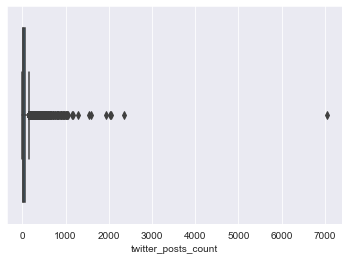

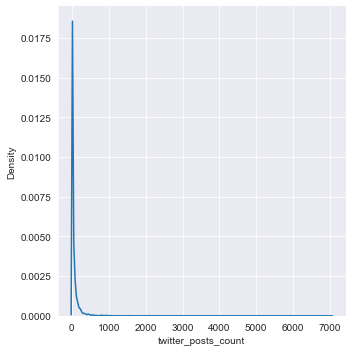

In [49]:
#Look into twitter posts mentions frequency

sns.set_style(style="darkgrid")
sns.boxplot(twitter1['twitter_posts_count'])
sns.displot(twitter1['twitter_posts_count'], kind="kde", bw_adjust=.25)

In [50]:
twitter1['twitter_posts_count'].value_counts().sort_index()

2.0       143
3.0       178
4.0       215
5.0       186
6.0       172
         ... 
1925.0      1
2038.0      1
2063.0      1
2360.0      1
7044.0      1
Name: twitter_posts_count, Length: 421, dtype: int64

In [51]:
counts=twitter1['twitter_posts_count'].value_counts().sort_index()
twitter1 = twitter1[~twitter1['twitter_posts_count'].isin(counts[(counts<20)].index)] # filter out twitter posts count with frequencies less than 20
twitter1=twitter1[twitter1['twitter_posts_count']<=50] # filter out twitter posts count having values greater than 50

In [52]:
twitter1['twitter_posts_count'].value_counts()

4.0     215
5.0     186
3.0     178
6.0     172
8.0     167
7.0     166
9.0     157
2.0     143
11.0     99
12.0     97
10.0     94
13.0     85
17.0     80
15.0     79
14.0     77
16.0     77
18.0     67
19.0     60
23.0     58
24.0     56
21.0     56
20.0     55
22.0     55
30.0     52
34.0     51
26.0     50
25.0     49
28.0     48
33.0     46
29.0     43
27.0     42
46.0     35
37.0     34
32.0     33
31.0     30
39.0     30
41.0     29
35.0     27
44.0     27
38.0     27
45.0     26
36.0     25
40.0     23
48.0     23
43.0     23
50.0     20
Name: twitter_posts_count, dtype: int64

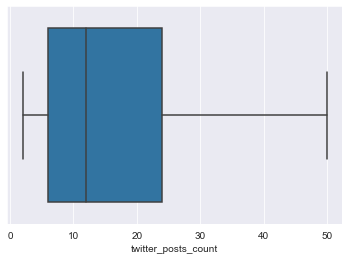

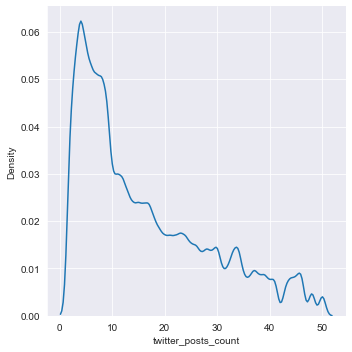

In [53]:
sns.set_style(style="darkgrid")
sns.boxplot(twitter1['twitter_posts_count'])

sns.displot(twitter1['twitter_posts_count'], kind="kde", bw_adjust=.25)


In [54]:
twitter1.reset_index(drop=True, inplace=True)

In [55]:
len(twitter1)

3272

In [56]:
twitter1.head()

,publisher,journal,research_type,country,twitter_author_followers,tweeter_posting_year,twitter_posts_count,"Biochemistry, Genetics and Molecular Biology",Agricultural and Biological Sciences,Life Sciences,...,aruk,bhf,cruk,niams,csouk,fwf,researcher,member_of_the_public,science_communicator,practitioner
0,Oxford University Press,Molecular Biology and Evolution,article,ES,2297.0,2014,2.0,1,1,1,...,0,0,0,0,0,0,1,1,0,0
1,Oxford University Press for The Company of Bio...,Development (09501991),article,US,229.0,2017,9.0,0,0,0,...,0,0,0,0,0,0,4,3,2,0
2,The Royal Society of Chemistry,Physical Chemistry Chemical Physics (PCCP),article,US,161.0,2017,3.0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
3,BioMed Central Ltd,BMC Public Health,article,US,1399.0,2012,4.0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
4,BMJ Publishing Group Ltd,Sexually Transmitted Infections,article,US,17063.0,2014,17.0,0,0,0,...,0,0,0,0,0,0,1,6,1,2


In [57]:
twitter1.describe()

,twitter_author_followers,tweeter_posting_year,twitter_posts_count,"Biochemistry, Genetics and Molecular Biology",Agricultural and Biological Sciences,Life Sciences,Physical Sciences,Environmental Science,Medicine,Health Sciences,...,aruk,bhf,cruk,niams,csouk,fwf,researcher,member_of_the_public,science_communicator,practitioner
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,...,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000
mean,3997.410147,2015.108802,16.116443,0.276895,0.071516,0.333741,0.106357,0.030868,0.604523,0.616137,...,0.003362,0.014059,0.014670,0.011308,0.007335,0.001528,3.735330,8.184902,0.716993,1.567237
std,16982.173033,1.606817,12.328414,0.447532,0.257724,0.471620,0.308341,0.172986,0.489028,0.486400,...,0.057893,0.117751,0.120246,0.105753,0.085343,0.039067,4.281475,6.827775,0.960220,2.417278
min,1.000000,2011.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,402.000000,2014.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,1063.000000,2015.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,1.000000
75%,2572.750000,2017.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,12.000000,1.000000,2.000000
max,489937.000000,2018.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000,37.000000,9.000000,20.000000


In [58]:
twitter2=twitter1.copy(deep=False)

In [59]:
#log2 conversion
twitter2['twitter_author_followers_log'] = np.log2(twitter2['twitter_author_followers'])
twitter2[['twitter_author_followers_log','twitter_author_followers']]

,twitter_author_followers_log,twitter_author_followers
0,11.165535,2297.0
1,7.839204,229.0
2,7.330917,161.0
3,10.450180,1399.0
4,14.058584,17063.0
...,...,...
3267,10.570804,1521.0
3268,11.763212,3476.0
3269,14.047976,16938.0
3270,10.894818,1904.0


In [60]:
#one-hot encoding
categorical_cols = ['publisher', 'journal', 'research_type','country'] 
twitter2 = pd.get_dummies(twitter2, columns = categorical_cols)

In [61]:
twitter2['twitter_posts_count'].nunique()

46

In [62]:
#multiclass labeling by equal width binning
bins = np.linspace(1,50,6,endpoint=True)
labels = ['class1', 'class2','class3', 'class4','class5']

twitter2['twitter_posts_count_class'] = pd.cut(twitter2['twitter_posts_count'], bins=bins, labels=labels, include_lowest=True)

In [63]:
#target column
twitter2['twitter_posts_count_class'].value_counts()

class1    1478
class2     776
class3     509
class4     326
class5     183
Name: twitter_posts_count_class, dtype: int64

In [64]:
twitter2=twitter2.drop(['twitter_author_followers','twitter_posts_count'], axis=1)

In [65]:
twitter2.head()

,tweeter_posting_year,"Biochemistry, Genetics and Molecular Biology",Agricultural and Biological Sciences,Life Sciences,Physical Sciences,Environmental Science,Medicine,Health Sciences,Social Sciences,Chemistry,...,country_TW,country_TZ,country_UA,country_UG,country_US,country_VE,country_ZA,country_ZM,country_ZW,twitter_posts_count_class
0,2014,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,class1
1,2017,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,class1
2,2017,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,class1
3,2012,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,class1
4,2014,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,class2


In [66]:
twitter2.columns

Index(['tweeter_posting_year', 'Biochemistry, Genetics and Molecular Biology',
       'Agricultural and Biological Sciences', 'Life Sciences',
       'Physical Sciences', 'Environmental Science', 'Medicine',
       'Health Sciences', 'Social Sciences', 'Chemistry',
       ...
       'country_TW', 'country_TZ', 'country_UA', 'country_UG', 'country_US',
       'country_VE', 'country_ZA', 'country_ZM', 'country_ZW',
       'twitter_posts_count_class'],
      dtype='object', length=505)

### Extracting Feature columns and target columns

In [67]:
#input features
X_tweets = twitter2.drop('twitter_posts_count_class', axis=1)
X_tweets

,tweeter_posting_year,"Biochemistry, Genetics and Molecular Biology",Agricultural and Biological Sciences,Life Sciences,Physical Sciences,Environmental Science,Medicine,Health Sciences,Social Sciences,Chemistry,...,country_TR,country_TW,country_TZ,country_UA,country_UG,country_US,country_VE,country_ZA,country_ZM,country_ZW
0,2014,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2012,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2014,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,2013,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3268,2014,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3269,2015,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3270,2012,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#target column
y_tweets = twitter2['twitter_posts_count_class']
y_tweets

0       class1
1       class1
2       class1
3       class1
4       class2
         ...  
3267    class1
3268    class1
3269    class3
3270    class1
3271    class5
Name: twitter_posts_count_class, Length: 3272, dtype: category
Categories (5, object): ['class1' < 'class2' < 'class3' < 'class4' < 'class5']

## Model Building and Performance Evaluation

In [69]:
#!conda install -c conda-forge xgboost
#!pip install xgboost

In [70]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

import xgboost



In [71]:
#Train_test split, ratio 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_tweets, y_tweets, train_size=0.80, test_size=0.20, random_state=42)

**1. Support Vector Machine (SVM): RBF Kernel and Polynomial Kernel**

In [72]:
#fit to model
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [73]:
#prediction
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [84]:
# accuracy calculation: Polynomial Kernel
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print(classification_report(y_test, poly_pred ))

Accuracy (Polynomial Kernel):  42.75
F1 (Polynomial Kernel):  25.60
              precision    recall  f1-score   support

      class1       0.43      1.00      0.60       280
      class2       0.00      0.00      0.00       164
      class3       0.00      0.00      0.00       119
      class4       0.00      0.00      0.00        58
      class5       0.00      0.00      0.00        34

    accuracy                           0.43       655
   macro avg       0.09      0.20      0.12       655
weighted avg       0.18      0.43      0.26       655



C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# accuracy calculation: RBF Kernel
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
print(classification_report(y_test, rbf_pred))

Accuracy (RBF Kernel):  42.75
F1 (RBF Kernel):  25.60
              precision    recall  f1-score   support

      class1       0.43      1.00      0.60       280
      class2       0.00      0.00      0.00       164
      class3       0.00      0.00      0.00       119
      class4       0.00      0.00      0.00        58
      class5       0.00      0.00      0.00        34

    accuracy                           0.43       655
   macro avg       0.09      0.20      0.12       655
weighted avg       0.18      0.43      0.26       655



C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2. K-Nearest Neighbor (KNN) Classifier**

In [76]:
#binding parameters, fit to model, and predict
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

In [77]:
# accuracy calculation
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
print('Accuracy (Knn classifier): ', "%.2f" % (knn_accuracy*100))
print('F1 (Knn classifier): ', "%.2f" % (knn_f1*100))
print(classification_report(y_test, knn_predictions))

Accuracy (Knn classifier):  81.98
F1 (Knn classifier):  81.51
              precision    recall  f1-score   support

      class1       0.89      0.98      0.93       280
      class2       0.80      0.76      0.78       164
      class3       0.75      0.71      0.73       119
      class4       0.62      0.57      0.59        58
      class5       0.80      0.59      0.68        34

    accuracy                           0.82       655
   macro avg       0.77      0.72      0.74       655
weighted avg       0.81      0.82      0.82       655



**3. Random Forest (RF) Classifier**

In [78]:
#binding parameters, fit to model, and predict
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [79]:
# accuracy calculation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
print('Accuracy (RF classifier): ', "%.2f" % (rf_accuracy*100))
print('F1 (RF classifier): ', "%.2f" % (rf_f1*100))
print(classification_report(y_test, rf_predictions))

Accuracy (RF classifier):  73.44
F1 (RF classifier):  72.11
              precision    recall  f1-score   support

      class1       0.88      0.98      0.93       280
      class2       0.66      0.71      0.68       164
      class3       0.59      0.43      0.50       119
      class4       0.44      0.43      0.43        58
      class5       0.68      0.38      0.49        34

    accuracy                           0.73       655
   macro avg       0.65      0.59      0.61       655
weighted avg       0.72      0.73      0.72       655



### **One-vs-rest (SVM, XGBoost)**

**1. One-vs.rest (SVM)**

In [80]:
svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)
svm_predictions_labels = svm_classifier.predict(X_test)

In [81]:
# accuracy calculation: 
svm_accuracy = accuracy_score(y_test, svm_predictions_labels)
svm_f1 = f1_score(y_test, svm_predictions_labels, average='weighted')
print('Accuracy (One-vs-rest SVM classification): ', "%.2f" % (svm_accuracy*100))
print('F1 (One-vs-rest SVM classification): ', "%.2f" % (svm_f1*100))
print(classification_report(y_test, svm_predictions_labels))

Accuracy (One-vs-rest SVM classification):  42.75
F1 (One-vs-rest SVM classification):  25.60
              precision    recall  f1-score   support

      class1       0.43      1.00      0.60       280
      class2       0.00      0.00      0.00       164
      class3       0.00      0.00      0.00       119
      class4       0.00      0.00      0.00        58
      class5       0.00      0.00      0.00        34

    accuracy                           0.43       655
   macro avg       0.09      0.20      0.12       655
weighted avg       0.18      0.43      0.26       655



C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2. One-vs.rest (XGBoost)**

In [82]:
xgb_model = xgboost.XGBClassifier(num_class=7,
                                  learning_rate=0.1,
                                  num_iterations=1000,
                                  max_depth=10,
                                  feature_fraction=0.7, 
                                  scale_pos_weight=1.5,
                                  boosting='gbdt',
                                  metric='multiclass',
                                  eval_metric='mlogloss',
                                  use_label_encoder=True)
xhr_pred = xgb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, xhr_pred))

[22:10:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "boosting", "feature_fraction", "metric", "num_iterations", "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\Z1936043\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

      class1       0.91      0.97      0.94       280
      class2       0.77      0.77      0.77       164
      class3       0.72      0.56      0.63       119
      class4       0.48      0.57      0.52        58
      class5       0.68      0.62      0.65        34

    accuracy                           0.79       655
   macro avg       0.71      0.70      0.70       655
weighted avg       0.79      0.79      0.79       655



In [83]:
# accuracy calculation: 
xgb_accuracy = accuracy_score(y_test, xhr_pred)
xgb_f1 = f1_score(y_test, xhr_pred, average='weighted')
print('Accuracy (One-vs-rest XGBoost classification): ', "%.2f" % (xgb_accuracy*100))
print('F1 (One-vs-rest XGBoost classification): ', "%.2f" % (xgb_f1*100))

Accuracy (One-vs-rest XGBoost classification):  79.24
F1 (One-vs-rest XGBoost classification):  78.91


### Thank You!